# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[0])

Number of cities in the list: 637
ancud


---

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and get results in Fahrenheit
    city_url = url + f"appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
ancud
Processing Record 2 of Set 1 | grand river south east
grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | hilo
hilo
Processing Record 4 of Set 1 | fort nelson
fort nelson
Processing Record 5 of Set 1 | rikitea
rikitea
Processing Record 6 of Set 1 | lenauheim
lenauheim
Processing Record 7 of Set 1 | hermanus
hermanus
Processing Record 8 of Set 1 | provideniya
provideniya
Processing Record 9 of Set 1 | khatanga
khatanga
Processing Record 10 of Set 1 | busselton
busselton
Processing Record 11 of Set 1 | gladstone
gladstone
Processing Record 12 of Set 1 | longyearbyen
longyearbyen
Processing Record 13 of Set 1 | jamestown
jamestown
Processing Record 14 of Set 1 | vaitape
vaitape
Processing Record 15 of Set 1 | cape town
cape town
Processing Record 16 of Set 1 | atuona
atuona
Processing Record 17 of Set 1 | rocha
rocha
Processing Record 18 of Set 1 | vaini
vai

Processing Record 5 of Set 4 | louisbourg
louisbourg
City not found. Skipping...
Processing Record 6 of Set 4 | mandalgovi
mandalgovi
Processing Record 7 of Set 4 | port alfred
port alfred
Processing Record 8 of Set 4 | margate
margate
Processing Record 9 of Set 4 | presidencia roque saenz pena
presidencia roque saenz pena
Processing Record 10 of Set 4 | leningradskiy
leningradskiy
Processing Record 11 of Set 4 | codrington
codrington
Processing Record 12 of Set 4 | mount isa
mount isa
Processing Record 13 of Set 4 | araouane
araouane
Processing Record 14 of Set 4 | oum hadjer
oum hadjer
Processing Record 15 of Set 4 | fortuna
fortuna
Processing Record 16 of Set 4 | saskylakh
saskylakh
Processing Record 17 of Set 4 | esperance
esperance
Processing Record 18 of Set 4 | abu kamal
abu kamal
Processing Record 19 of Set 4 | ronnenberg
ronnenberg
Processing Record 20 of Set 4 | nanortalik
nanortalik
Processing Record 21 of Set 4 | tripoli
tripoli
Processing Record 22 of Set 4 | ornskoldsvik


Processing Record 10 of Set 7 | civitanova marche
civitanova marche
Processing Record 11 of Set 7 | satipo
satipo
Processing Record 12 of Set 7 | oxelosund
oxelosund
Processing Record 13 of Set 7 | port lincoln
port lincoln
Processing Record 14 of Set 7 | suzhou
suzhou
Processing Record 15 of Set 7 | jiangyou
jiangyou
Processing Record 16 of Set 7 | belaya gora
belaya gora
Processing Record 17 of Set 7 | sola
sola
Processing Record 18 of Set 7 | anadyr
anadyr
Processing Record 19 of Set 7 | sao lourenco do sul
sao lourenco do sul
Processing Record 20 of Set 7 | clyde river
clyde river
Processing Record 21 of Set 7 | sentyabrskiy
sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 7 | jumla
jumla
Processing Record 23 of Set 7 | bjala
bjala
City not found. Skipping...
Processing Record 24 of Set 7 | lavrentiya
lavrentiya
Processing Record 25 of Set 7 | san jeronimo
san jeronimo
Processing Record 26 of Set 7 | husavik
husavik
Processing Record 27 of Set 7 | sorland
sorlan

Processing Record 15 of Set 10 | samusu
samusu
City not found. Skipping...
Processing Record 16 of Set 10 | broome
broome
Processing Record 17 of Set 10 | deh rawud
deh rawud
City not found. Skipping...
Processing Record 18 of Set 10 | namibe
namibe
Processing Record 19 of Set 10 | havelock
havelock
Processing Record 20 of Set 10 | ibanda
ibanda
Processing Record 21 of Set 10 | soure
soure
Processing Record 22 of Set 10 | sovetskiy
sovetskiy
Processing Record 23 of Set 10 | tessalit
tessalit
Processing Record 24 of Set 10 | riyadh
riyadh
Processing Record 25 of Set 10 | okhotsk
okhotsk
Processing Record 26 of Set 10 | quelimane
quelimane
Processing Record 27 of Set 10 | birao
birao
Processing Record 28 of Set 10 | conceicao do araguaia
conceicao do araguaia
Processing Record 29 of Set 10 | tuatapere
tuatapere
Processing Record 30 of Set 10 | fougamou
fougamou
Processing Record 31 of Set 10 | cidreira
cidreira
Processing Record 32 of Set 10 | russell
russell
Processing Record 33 of Set 

Processing Record 21 of Set 13 | mareeba
mareeba
Processing Record 22 of Set 13 | port augusta
port augusta
Processing Record 23 of Set 13 | haapu
haapu
City not found. Skipping...
Processing Record 24 of Set 13 | marfino
marfino
Processing Record 25 of Set 13 | ranot
ranot
Processing Record 26 of Set 13 | anloga
anloga
Processing Record 27 of Set 13 | maniitsoq
maniitsoq
Processing Record 28 of Set 13 | tlahualilo
tlahualilo
City not found. Skipping...
Processing Record 29 of Set 13 | karauzyak
karauzyak
City not found. Skipping...
Processing Record 30 of Set 13 | ingleside
ingleside
Processing Record 31 of Set 13 | biscarrosse
biscarrosse
Processing Record 32 of Set 13 | verkhnyaya inta
verkhnyaya inta
Processing Record 33 of Set 13 | garzon
garzon
Processing Record 34 of Set 13 | yatsuo
yatsuo
Processing Record 35 of Set 13 | perelyub
perelyub
Processing Record 36 of Set 13 | suntar
suntar
-----------------------------
Data Retrieval Complete      
-----------------------------


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,64.29,76,9,9.46,CL,1675802046
1,hilo,19.7297,-155.0900,77.29,97,100,4.61,US,1675801901
2,fort nelson,58.8053,-122.7002,33.39,72,2,5.10,CA,1675802060
3,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675801849
4,lenauheim,45.8719,20.7994,27.01,72,7,6.38,RO,1675802062


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,64.29,76,9,9.46,CL,1675802046
1,hilo,19.7297,-155.0900,77.29,97,100,4.61,US,1675801901
2,fort nelson,58.8053,-122.7002,33.39,72,2,5.10,CA,1675802060
3,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675801849
4,lenauheim,45.8719,20.7994,27.01,72,7,6.38,RO,1675802062


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

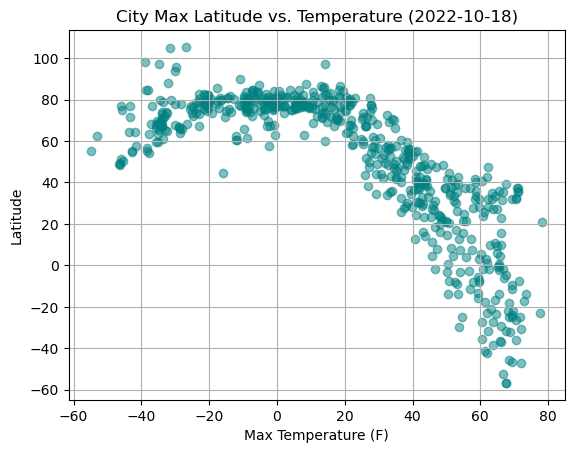

In [20]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]
plt.scatter(x_lat, y_temp, marker='o', color='teal', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

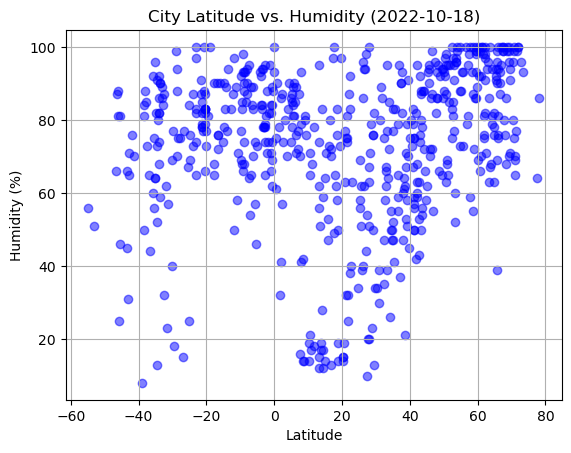

In [21]:
# Build the scatter plots for latitude vs. humidity
y_hum = city_data_df["Humidity"]
plt.scatter(x_lat, y_hum, marker='o', color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

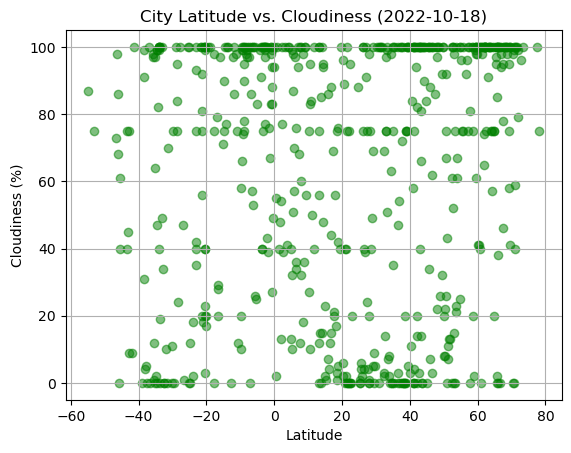

In [22]:
# Build the scatter plots for latitude vs. cloudiness
y_cloud = city_data_df["Cloudiness"]
plt.scatter(x_lat, y_cloud, marker='o', color='green', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

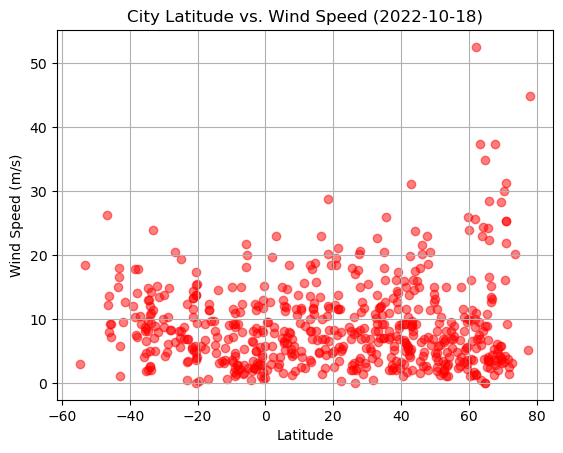

In [23]:
# Build the scatter plots for latitude vs. wind speed
y_wind = city_data_df["Wind Speed"]
plt.scatter(x_lat, y_wind, marker='o', color = 'red', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def lin_plot(x, y, location, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-")
    plt.scatter(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", location, color = 'r')
    print(f"The r-value is {rvalue}")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,77.29,97,100,4.61,US,1675801901
2,fort nelson,58.8053,-122.7002,33.39,72,2,5.10,CA,1675802060
4,lenauheim,45.8719,20.7994,27.01,72,7,6.38,RO,1675802062
6,provideniya,64.3833,-173.3000,-16.55,94,57,3.69,RU,1675802070
7,khatanga,71.9667,102.5000,-47.13,100,79,2.42,RU,1675801917


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,64.29,76,9,9.46,CL,1675802046
3,rikitea,-23.1203,-134.9692,78.93,74,93,12.28,PF,1675801849
5,hermanus,-34.4187,19.2345,68.81,80,82,12.88,ZA,1675801844
8,busselton,-33.6500,115.3333,61.16,90,19,9.35,AU,1675801848
9,gladstone,-23.8500,151.2500,73.33,73,18,6.91,AU,1675802071


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8605188759828605


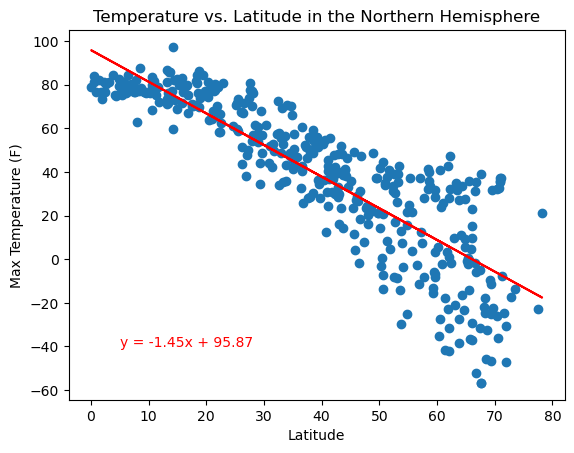

In [48]:
# Linear regression on Northern Hemisphere
x_lat_north = northern_hemi_df["Lat"]
y_temp_north = northern_hemi_df["Max Temp"]
lin_plot(x_lat_north, y_temp_north, (5, -40), "Temperature vs. Latitude in the Northern Hemisphere", "Latitude", "Max Temperature (F)")

The r-value is 0.3870404554449764


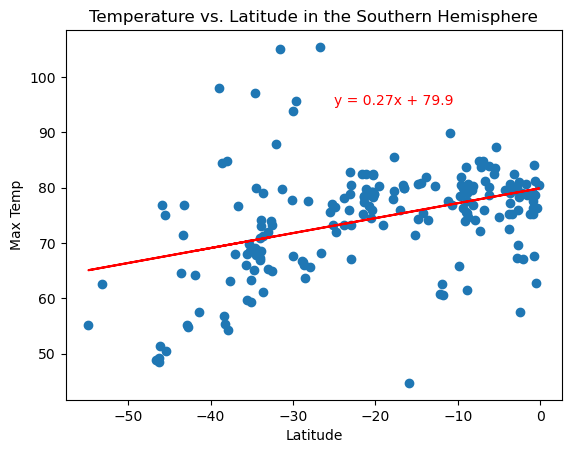

In [49]:
# Linear regression on Southern Hemisphere
x_lat_south = southern_hemi_df["Lat"]
y_temp_south = southern_hemi_df["Max Temp"]
lin_plot(x_lat_south, y_temp_south, (-25, 95), "Temperature vs. Latitude in the Southern Hemisphere", "Latitude", "Max Temp")

**Discussion about the linear relationship:** The linear regression lines for both the northern and southern hemisphere show trends of max temperature increasing the closer to the equator they get which makes sense as the equator is the hottest band on the planet. What I find interesting is the breaking from the trend in the southern hemisphere. To me this suggests that there could be a number of cities that are located in mountainous regions and therefore cooler or on the inverse, deserts created by said mountainous regions where the temperature can reach much higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4457639734542233


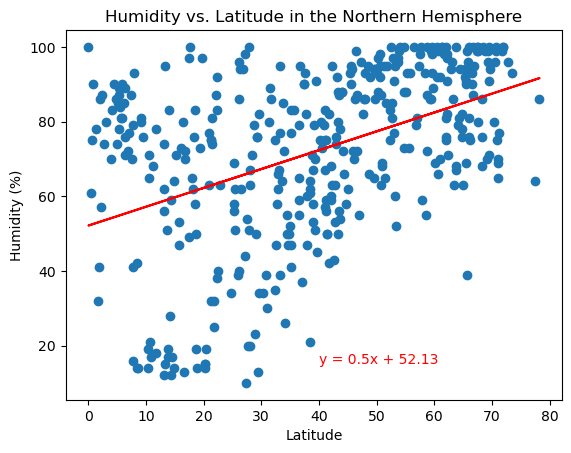

In [50]:
# Northern Hemisphere
y_hum_north = northern_hemi_df["Humidity"]
lin_plot(x_lat_north, y_hum_north, (40, 15), "Humidity vs. Latitude in the Northern Hemisphere", "Latitude", "Humidity (%)")

The r-value is 0.3208000530395264


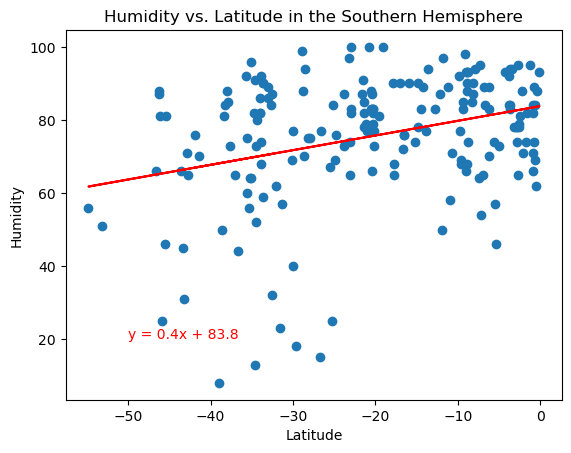

In [51]:
# Southern Hemisphere
y_hum_south = southern_hemi_df["Humidity"]
lin_plot(x_lat_south, y_hum_south, (-50, 20), "Humidity vs. Latitude in the Southern Hemisphere", "Latitude", "Humidity")

**Discussion about the linear relationship:** What these graphs suggest to me is that due to the shifting patterns of cloud cover and weather, humidity isn't strongly dependent on the latitude. What matters more is likely to be geological features such as mountains which can create areas of high humidity and low humidity on either side of them.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.24490503800645683


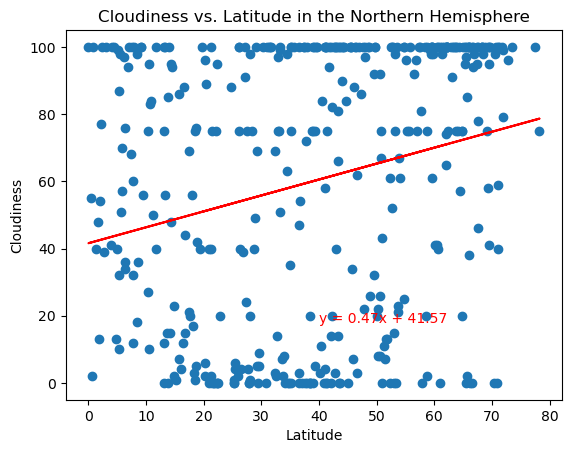

In [52]:
# Northern Hemisphere
y_cloud_north = northern_hemi_df["Cloudiness"]
lin_plot(x_lat_north, y_cloud_north, (40, 18), "Cloudiness vs. Latitude in the Northern Hemisphere", "Latitude", "Cloudiness")

The r-value is 0.29849995350161335


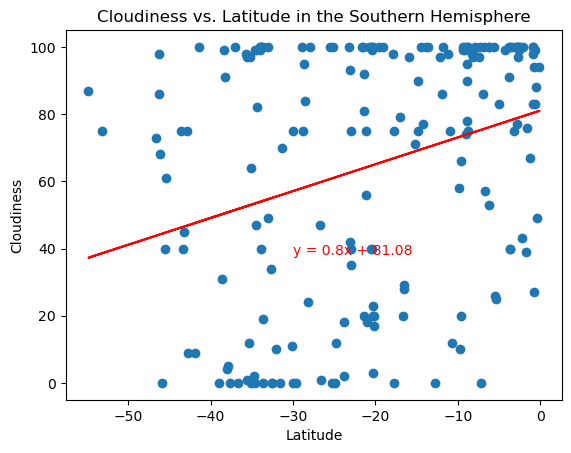

In [53]:
# Southern Hemisphere
y_cloud_south = southern_hemi_df["Cloudiness"]
lin_plot(x_lat_south, y_cloud_south, (-30, 38), "Cloudiness vs. Latitude in the Southern Hemisphere", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Similarly to the humidity plots, there does not seem to be a strong relationship between latitude and cloudiness in either the northern or southern hemispheres. Again, it seems likely that other factors such as geological features play a bigger factor such as mountains, or distance to bodies of water.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0672904744002964


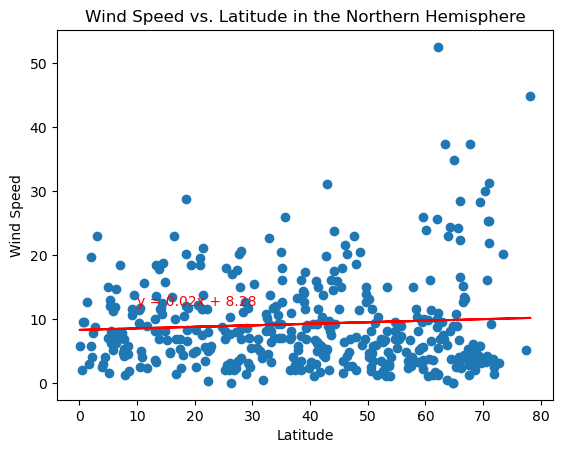

In [54]:
# Northern Hemisphere
y_wind_north = northern_hemi_df["Wind Speed"]
lin_plot(x_lat_north, y_wind_north, (10, 12), "Wind Speed vs. Latitude in the Northern Hemisphere", "Latitude", "Wind Speed")

The r-value is -0.31536308466212337


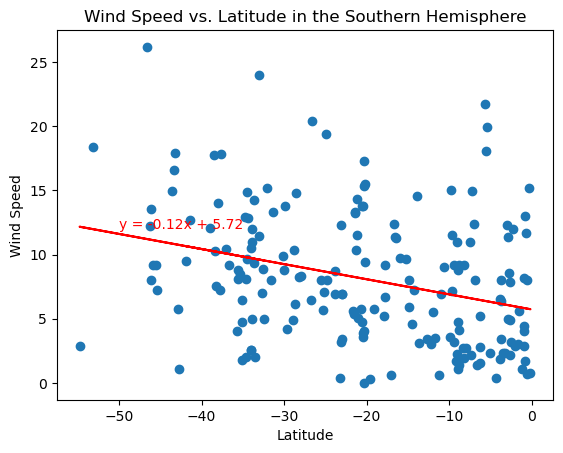

In [55]:
# Southern Hemisphere
y_wind_south = southern_hemi_df["Wind Speed"]
lin_plot(x_lat_south, y_wind_south, (-50, 12), "Wind Speed vs. Latitude in the Southern Hemisphere", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Similarly to the humidity and cloud cover graphs, there does not seem to be a relationship between latitude and wind speed. Quite the contrary, it seems that wind speeds are consistent despite the latitude. Most likely we would see changes over time in wind speeds due to weather patterns such as hurricanes and the like. Humidity, cloud cover and wind speed tend to be closely interlinked as (in a basic sense) winds push clouds which impact the humidity of the locale.